In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
header = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','classification']
df=pd.read_csv("/home/ijaju/Documents/datasets/kidney_disease.csv",index_col=0)
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [21]:
print(df.shape)
df.dtypes

(401, 25)


age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wbcc              object
rbcc              object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [11]:
df = df.dropna(axis=0, how="any")
df.shape

(158, 25)

In [12]:
categorical_ = ['rbc', 'pc', 'pcc', 'ba', 'htn','dm', 'cad', 'appet', 'pe', 'ane']
df.drop(labels=categorical_, axis=1, inplace=True)
df.shape

(158, 15)

In [50]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'classification'],
      dtype='object')

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


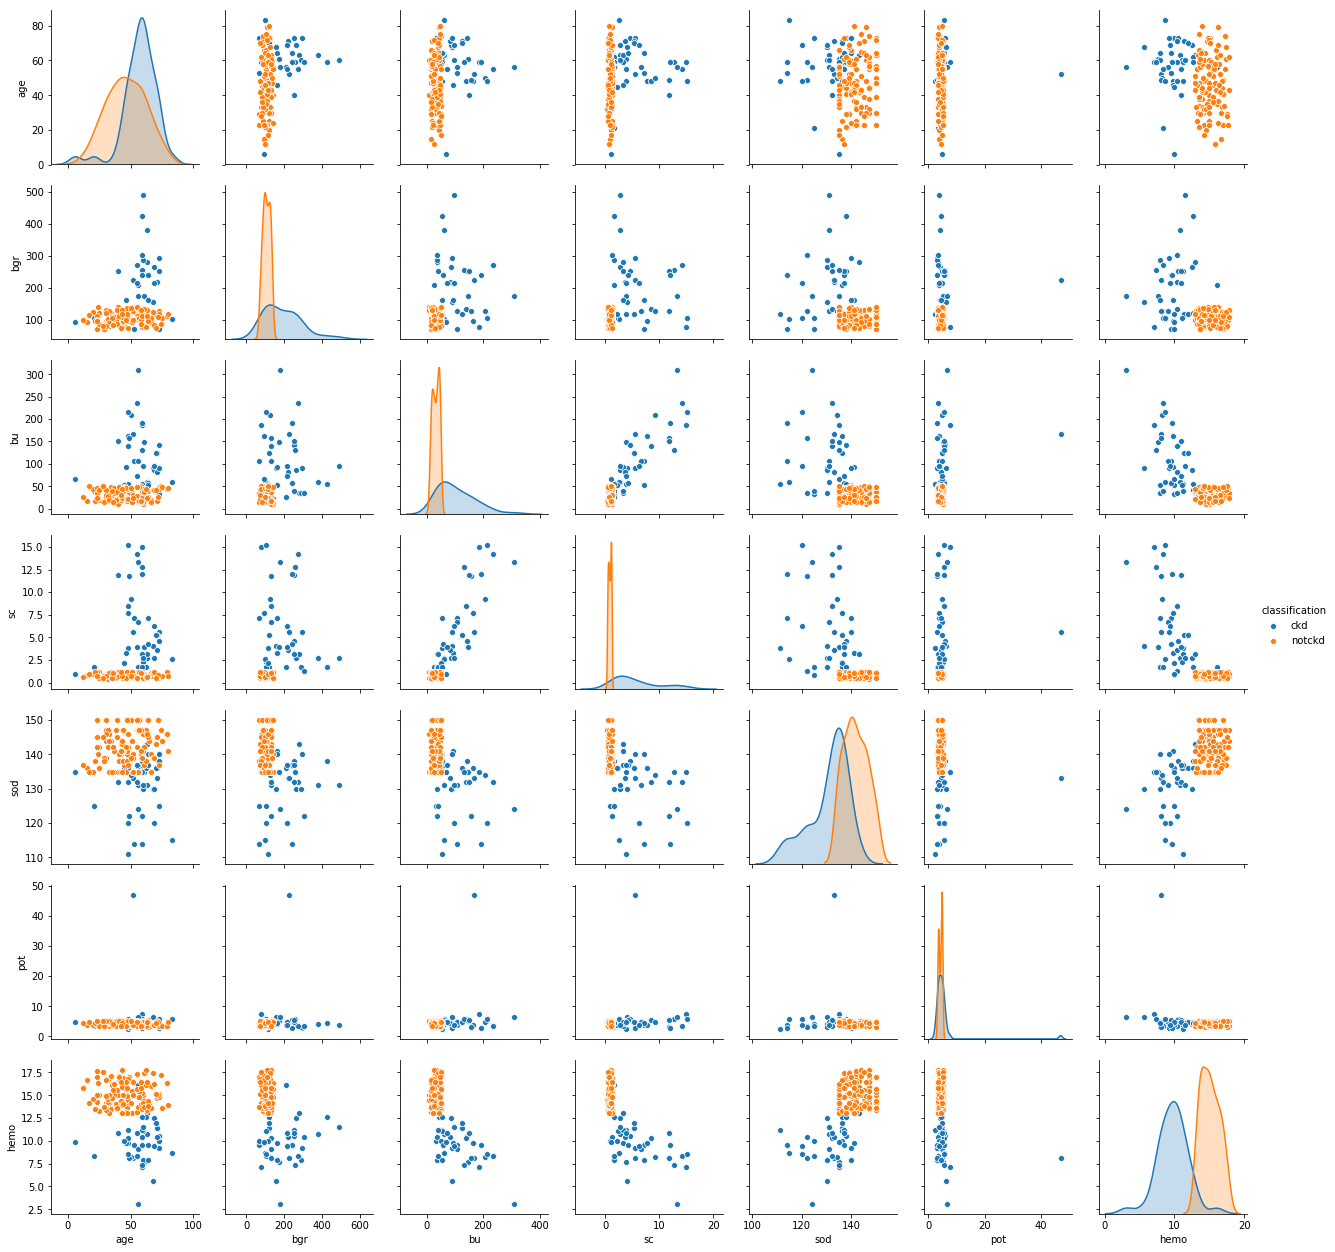

In [59]:
cols = ['age','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
sb.pairplot(df,vars=cols, hue="classification");
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array(df.drop(['classification'],1))
y = np.array(df['classification'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7) 

In [66]:
y_test

array(['notckd', 'notckd', 'notckd', 'notckd', 'notckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'notckd', 'notckd', 'notckd', 'ckd',
       'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'notckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'notckd', 'notckd', 'notckd',
       'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd'],
      dtype=object)

In [69]:
#SVM
from sklearn import preprocessing, cross_validation, neighbors, svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7291666666666666

In [16]:
#MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.7291666666666666

In [86]:
#Bagging - Random Forest
y_train_classes = np.where(y_train=="ckd",1,-1)
y_test_classes = np.where(y_test=="ckd",1,-1)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train, y_train_classes)
y_pred = rf.predict(X_test)

In [87]:
accuracy_score(y_test_classes,y_pred.round(), normalize=False)

46

In [89]:
#Boosting - Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred)

1.0

In [14]:
#Boosting - XGBoost
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train,y_train)
y_pred = gbm.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
accuracy_score(y_test,y_pred)

1.0